In [6]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles

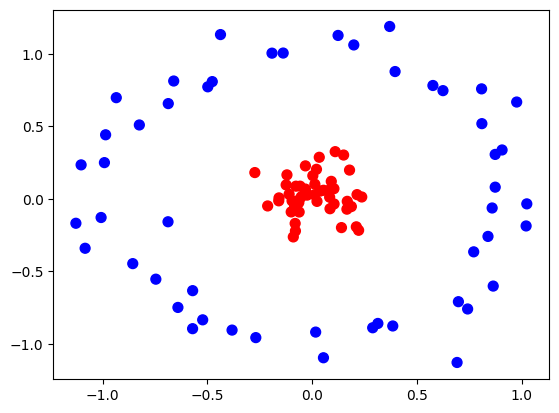

In [10]:
X,y=make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='bwr')

In [11]:
# train-test-split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
# classifiacation with normal SVM(linear)
clf=SVC(kernel='linear')
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [23]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.45

so here we are getting a accuracy score of 0.45 using simple SVM on the non-linear data

In [16]:
# classifiacation with kernel-trick SVM(RBF(Radial Basis Function))
clf_rbf=SVC(kernel='rbf')
clf_rbf.fit(X_train,Y_train)
Y_pred_rbf=clf_rbf.predict(X_test)

In [17]:
accuracy_score(Y_test,Y_pred_rbf)

1.0

so here we are getting a accuracy score of 100% using Kernel trick on SVM on the non-linear data

In [18]:
# plotting decision boundaries
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


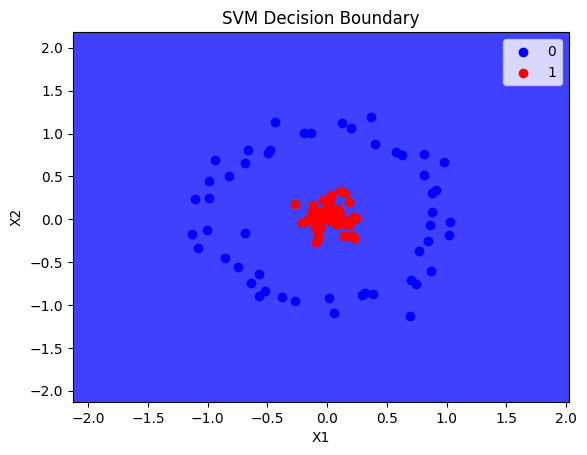

In [24]:
# for normal
plot_decision_boundary(X,y,clf)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


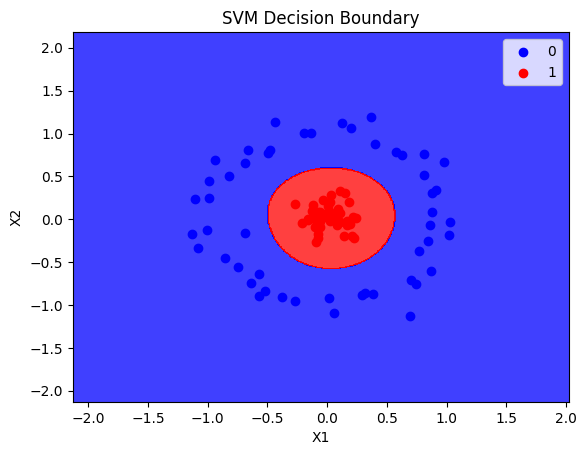

In [20]:
plot_decision_boundary(X,y,clf_rbf)

In [28]:
# the Kernel-trick
def plot_3d(X,y):
    z=np.exp(-(X ** 2).sum(1)) # we are applying e^(-X^2)
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],z,c=y,s=50,cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('Y1')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot: xlabel='X1', ylabel='Y1', zlabel='y'>

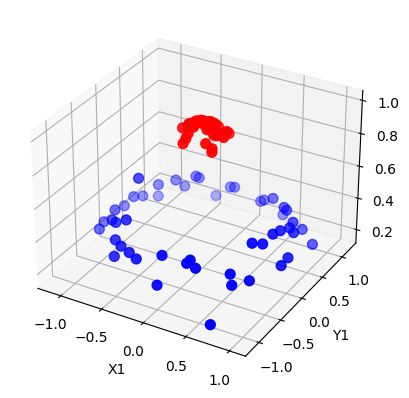

In [29]:
plot_3d(X,y)